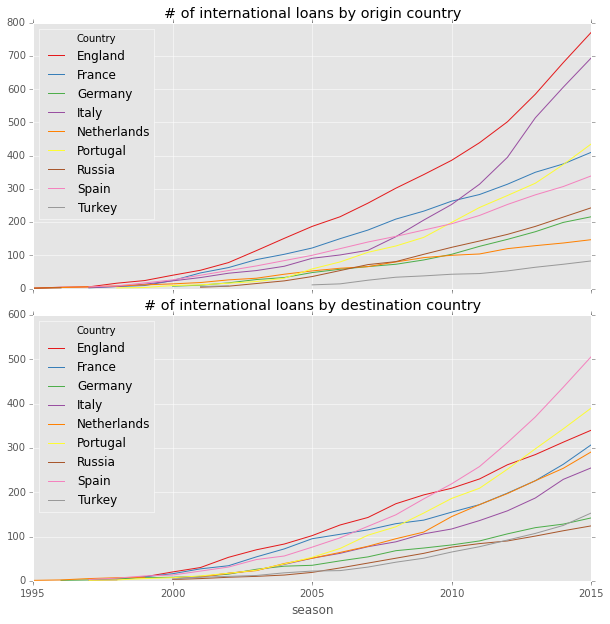

In [226]:
origin=loans[(loans['fromCountry']!=loans['toCountry'])&(loans['fromCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=loans[(loans['fromCountry']!=loans['toCountry'])&(loans['toCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Set1',title="# of international loans by origin country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Set1',title="# of international loans by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_loans_by_country.png')

#ax1.set(sub1)

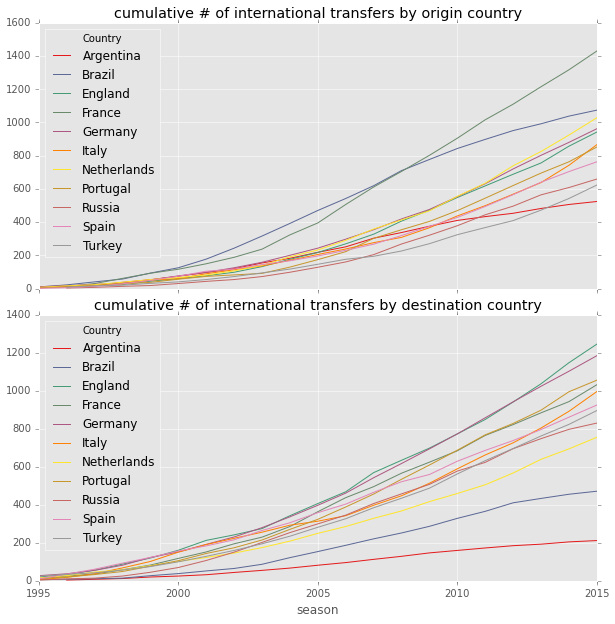

In [339]:
origin=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['season']>0)&(nonloans['Age'].between(20,25))&(nonloans['fromCountry'].isin(['England','Brazil','Argentina','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['season']>0)&(nonloans['Age'].between(20,25))&(nonloans['toCountry'].isin(['England','Brazil','Argentina','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Set1',title="cumulative # of international transfers by origin country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Set1',title="cumulative # of international transfers by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_transfers_by_country.png')


#ax1.set(sub1)

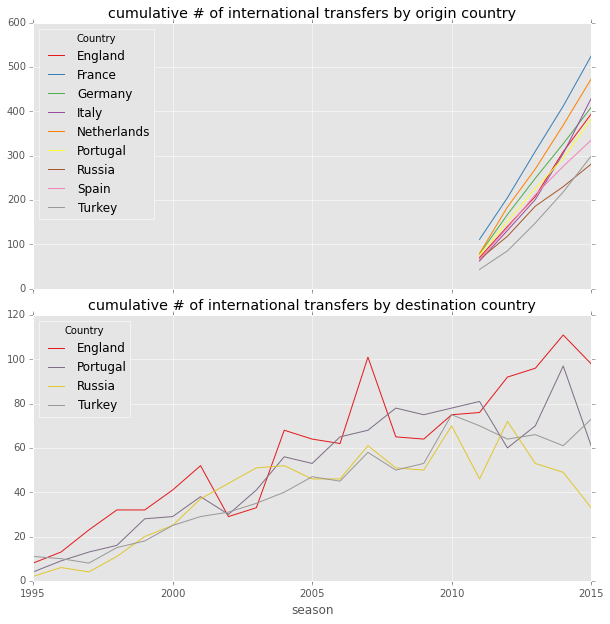

In [332]:
origin=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['season']>2010)&(nonloans['Age'].between(20,25))&(nonloans['fromCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['season']>0)&(nonloans['Age'].between(20,25))&(nonloans['toCountry'].isin(['England','Portugal','Russia','Turkey']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    #.cumsum()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Set1',title="cumulative # of international transfers by origin country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Set1',title="cumulative # of international transfers by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_transfers_by_country.png')


#ax1.set(sub1)

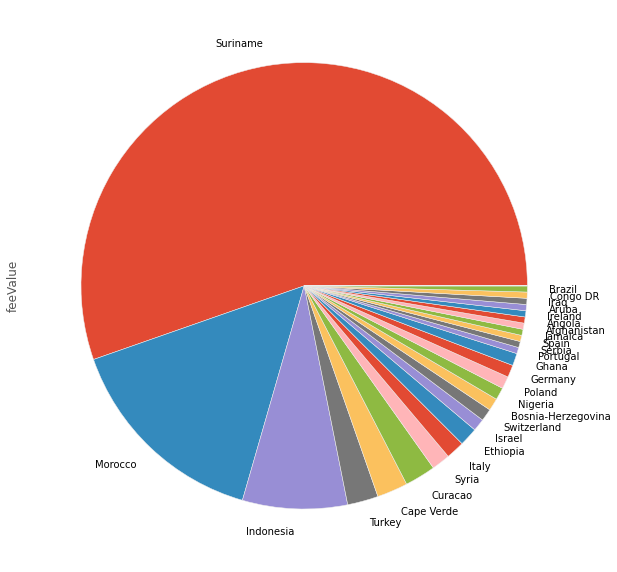

In [308]:
t=nonloans[(nonloans['toLeague']=='NL1')&(nonloans['Nationality']=='Netherlands')]
teamIdMap=t.drop_duplicates('fromTeamId')[['fromTeamId','fromTeamName']].set_index('fromTeamId').to_dict()['fromTeamName']

t.groupby('Nationality 2')[['feeValue']].count().sort_values('feeValue',ascending=False).rename(index=teamIdMap)['feeValue'].plot.pie(figsize=(10,10))

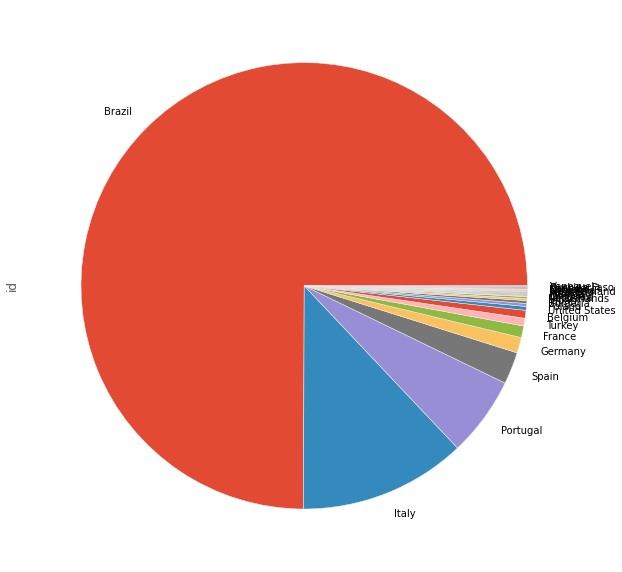

In [323]:
t=players[players['Nationality']=='Brazil'].copy()
t['Nationality 2']=np.where(t['Nationality 2'].isnull(),t['Nationality'],t['Nationality 2'])

t.groupby('Nationality 2')[['id']].count().sort_values('id',ascending=False).rename(index=teamIdMap)['id'].plot.pie(figsize=(10,10))

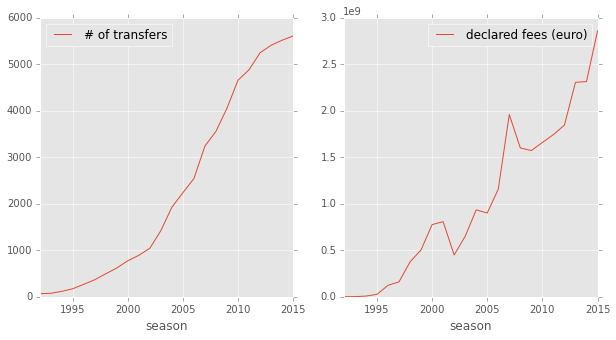

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5),sharex=True)


t=nonloans[(nonloans['fromLeague'].isin(['GB1','L1','FR1','ES1','NL1','PO1','BE1','TR1','RU1']))].groupby('season')[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of transfers','feeValue':"declared fees (euro)"})
t=nonloans[nonloans['fromCountry']!=nonloans['toCountry']].groupby('season')[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of transfers','feeValue':"declared fees (euro)"})

t[['# of transfers']].plot(ax=axes[0],xlim=(1995,2015))
t[['declared fees (euro)']].plot(ax=axes[1])

In [223]:
t=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&~(nonloans['toCountry'].isnull())&(nonloans['season'].between(2010,2015))].groupby(['toTeamId','toTeamName'])[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of transfers','feeValue':"declared fees (euro)"})

t.sort_values("# of transfers",ascending=False)[:10]

,,declared fees (euro),# of transfers
toTeamId,toTeamName,,
162.0,Monaco,272910000.0,68
683.0,Olympiacos,72295000.0,57
3057.0,Standard Liège,34780000.0,55
410.0,Udinese Calcio,87380000.0,54
294.0,Benfica,188860000.0,52
6321.0,Vancouver,4064000.0,52
12.0,AS Roma,193799000.0,49
336.0,Sporting CP,72226000.0,47
3205.0,Kayserispor,12220000.0,45


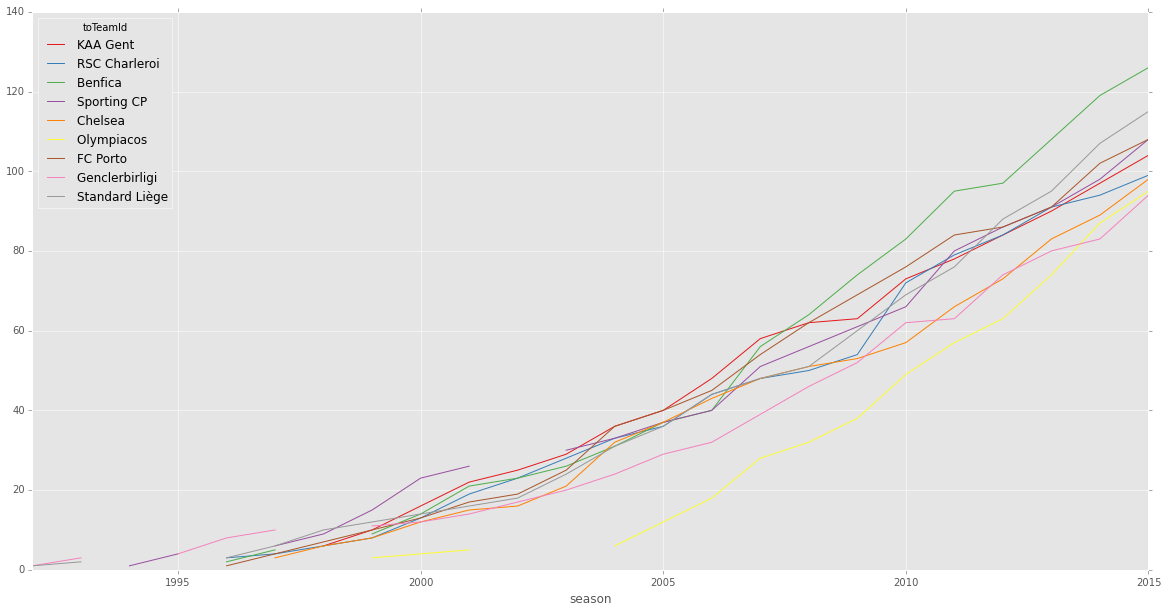

In [222]:
t=nonloans[(nonloans['toTeamId'].isin([294,3057,336,720,157,172,631,683,820]))&(nonloans['toCountry']!=nonloans['fromCountry'])] 

teamIdMap=t.drop_duplicates('toTeamId')[['toTeamId','toTeamName']].set_index('toTeamId').to_dict()['toTeamName']

#t.groupby(['season','fromTeamId'])['id'].count().rolling(window=1,center=False).mean().unstack().rename(columns=teamIdMap).plot(figsize=(20,10),colormap='Set1')
t.groupby(['season','toTeamId'])['id'].count().rolling(window=1,center=False).mean().unstack().cumsum().rename(columns=teamIdMap).plot(figsize=(20,10),colormap='Set1')

In [221]:
teamIdMap

{157.0: 'KAA Gent ',
 162.0: 'Monaco ',
 172.0: 'RSC Charleroi ',
 294.0: 'Benfica ',
 336.0: 'Sporting CP ',
 631.0: 'Chelsea ',
 683.0: 'Olympiacos ',
 720.0: 'FC Porto ',
 820.0: 'Genclerbirligi ',
 3057.0: 'Standard Li\xc3\xa8ge '}

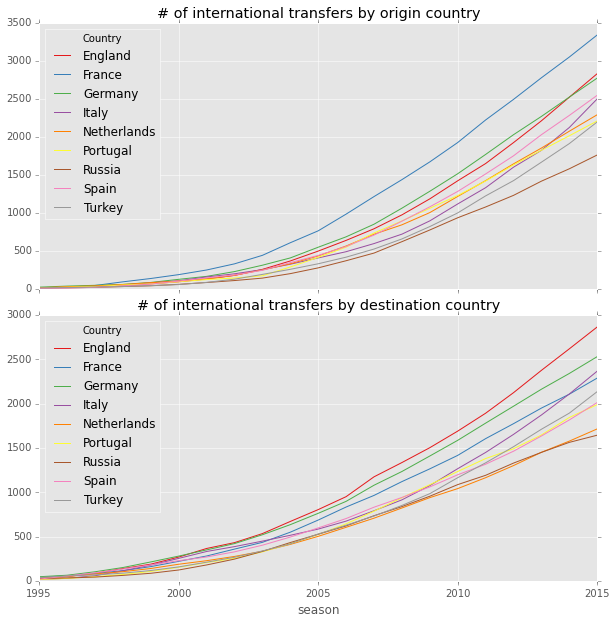

In [227]:
origin=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['fromCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['toCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Set1',title="# of international transfers by origin country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Set1',title="# of international transfers by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_transfers_by_country.png')


#ax1.set(sub1)

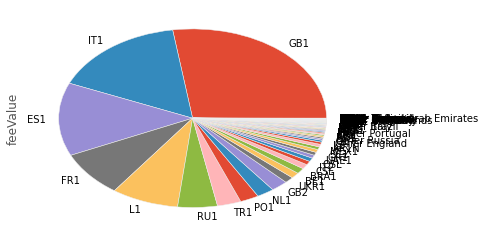

In [35]:
nonloans[(nonloans['season'].between(2000,2015))].groupby('toLeague')['feeValue'].sum().sort_values(ascending=False)[:100].plot.pie()

In [25]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 
import math

transfers = pd.read_csv('../data/merged/transfers.csv')
transfers['period']=pd.cut(nonloans['season'],[1995,2000,2005,2010,2015])
loans=transfers[transfers['isLoan']]
nonloans=transfers[~transfers['isLoan']]
players=pd.read_csv('../data/merged/players.csv')

leagueCodeMapping = {'GB1':'Premier League (England)','FR1':'Ligue 1 (France)',
                                                         'ES1':'La Liga (Spain)','IT1':'Serie A (Italy)','L1':'Bundesliga (Germany)',
                                                         'PO1':'Primeira Liga (Portugal)','NL1':'Eredivisie (Netherlands)'}